# P2: Investiganting a dataset

This is the project 2 of the Udacity's Data Analyst Nanodegree. It's build upon the introduction to data analysis course and has the main objectives to apply knwoledge on the pandas, numpy and matplotlib python libraries on the end-to-end process of data analysis. In this project we're going to go through all the five steps of the data analysis process, such as:

In [1]:
#importing libraries
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


C:\Users\70061076104\AppData\Local\conda\conda\envs\my_root\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


[]

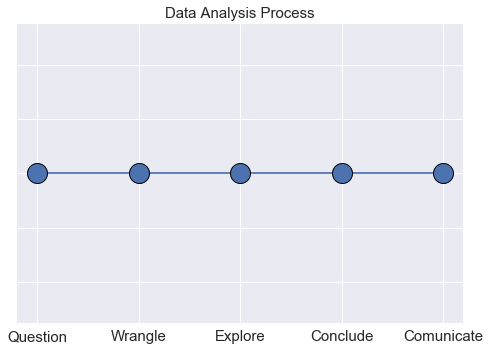

In [13]:
#create data analysis process visualization

process = pd.Series([1, 1, 1, 1, 1], index=['Question', 'Wrangle', 'Explore', 'Conclude', 'Comunicate'])
x = range(5)
plt.xticks(x, process.index)

plt.plot(x, process.values, marker='o', markersize=20, markeredgecolor='black', markeredgewidth=1)
plt.rc('xtick', labelsize=15) 
plt.title('Data Analysis Process', fontsize=15)

#hide y axis label
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])

# 1. The Dataset
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The key fact is that the ship was carring engough lifeboats for only 1,178 people, raising the question of the survivors patterns. ([wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic))

![titanic](imgs/titanic.jpg)

For this project, it will be investigated the dataset of titanic, with demographic data and informations of 891 out 2224 passangers and crew on board of the ship. This dataset has information about sex, age, ticket class, if has relatives on board, the port of embarkation and if has survived or not the incident.

## 1.1 Data Dictionary

In [ ]:
titanic_df = pd.read_csv('../documents/titanic_data.csv')

In [12]:
print titanic_df.columns
print titanic_df.shape

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
(891, 12)


The dataset is composed of 891 registries (rows) with 12 variables (columns). The 12 variables are:
* PassengerId
* Survived (0 = No, 1 = Yes)
* Pclass (1 = 1st, 2 = 2nd, 3 = 3rd)
* Name
* Sex
* Age
* SibSp (# of siblings / spouses aboard the Titanic)
* Parch (# of parents / children aboard the Titanic)
* Ticket
* Fare
* Cabin
* Embarked (Port of embarkation)

# 2. Questions
The main question is **what the survivors have in common?**. Was there a pattern between the survivors, such as the wealth, age or sex of the passanger? Based on the dataset, what can be deduced about the reasons the passangers survived?

To answer this question, some intermediate questions will be considered, such as:
* What is the level of survivors by class, sex, age and relatives on board?

* What is the correlation between class, sex, age, relatives on board and port of embarkation with survival?
    * Further assessments, such as the combination of variables and the survival rate. For example the correlation between first class females and the survivors.

* Couples or partens/childrens survived more?

* The ports has some correlation with the survivors? If so, is it because the ticket class? What is the location of each port on the city in relation with the wealthier neighboorhoods? << *Fazer um gráfico de longitude aqui*

* What is the correlation with the ticket fare and the class?

### Brainstorm Questions
tem algum padrão de classe nos portos (depois posso pesquisar quais eram de bairros mais humildes e em quais lugares da cidade)?
Procurar definir os intervalos de valores dos tickets com classes
Ver a quantidade de valor ticket/classe que embarcou em cada porto (talvez um gráfico scatter com s=sobreviventes)
Procurar relação de sobreviventes com grana, sexo e faixa etária

FOCUS: embarked stations


Experimente e sugira perguntas que promovam olhar para relacionamentos entre múltiplas variáveis. Você deve analisar pelo menos uma variável dependente e três variáveis independentes na sua investigação.
ex pergunta titanic: Quais os fatores que fizeram as pessoas mais propensas a sobreviver?

### orientações
[done] Uma nota especificando qual o dataset usado

Uma definição de qual pergunta você fez

Uma descrição do que você fez para investigar a pergunta

Descrição de qualquer limpeza de dados feita

Uma estatísticas resumo e gráficos comunicando o seu resultado final

sugestões para o projeto se destacar
* Utilize funcionalidades do NumPy ou Pandas que vão além do que foi coberto no curso.
* Use testes estatísticos para tirar conclusões rigorosas quando apropriado.

# 3. Wrangle
On this phase it will be conducted several tests to assess the consistensy of the dataset. The following verifications will be performed:
* The type of data matches with expected for the column?
* The values on the columns matches expected?
* c

**wrangling**

* find out NaN registries
* check if the base has other than specified values on categoricals (exs. idade maior que 100 e menor que 0, pclass diferente de 1,2,3 sexo diferente de h, m, survived diferente de 0,1,.... se tenho valores zerados de bilhetes)
* histograma de idade pra ver se não tem muito 0 na base
* tem id de passageiro repetido?
* check dtype for each column .info()


## 3.1 The type of data matches with expected for the column?

In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Based on the result of titanic_df.info(), it seems that de data types are suitable. 

**Warnings:**
* Survived could be transformed to boolean but integer will serve the task. It's not allowed any value different of 0 or 1.
* PassengerId and Pclass could be used as object (string), since they are categorical, but it's not a problem to mantain them as integer if not conducted descriptive analysis such as mean(), max(), std(), etc. 
* The Cabin column raises some caution due to the high number of missing values (687 out 891. 77%).
* There are 177 missing values on the Age columns, approximately 20%. This can bias conclusions if it has acctualy related to the survivors.

**Fun fact:**
* There are two port embark missing related to Mrs Martha Evelyn Stone and her maid, Miss Rose Amélie Icard. Rose has registered the events on a letter that has became famous later on.

## 3.2 The values on the columns matches expected?

### 3.2.1 PassangerId consistency

In [22]:
len(titanic_df.PassengerId.unique())

891

There is no duplicated passenger id.

### 3.2.2 Survived consistency

In [23]:
titanic_df.Survived.unique()

array([0, 1], dtype=int64)

There is no values other than 1 (lived) and 0 (died) on the dataset. 

### 3.2.3 Pclass consistency

In [24]:
titanic_df.Pclass.unique()

array([3, 1, 2], dtype=int64)

There is no values other than 1, 2, 3. Related to 1st, 2nd and 3rd classes on the ship.

### 3.2.4 Name consistency

In [25]:
len(titanic_df.Name.unique())

891

There is no duplicated names on the dataset

### 3.2.5 Sex consistency

In [26]:
titanic_df.Sex.unique()

array(['male', 'female'], dtype=object)

There is no value other than 'male' and 'female' on the dataset.

### 3.2.6 SibSp consistency

In [27]:
titanic_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [34]:
titanic_df[titanic_df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [35]:
titanic_df[titanic_df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [33]:
titanic_df[titanic_df['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


### 3.2.7 Parch consistency

In [36]:
titanic_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [40]:
titanic_df[titanic_df['Parch'] == 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.00,5,2,CA 2144,46.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S


pela idade ver se tenho criança casada

# 4 Explore
.describe()
graphs

In [4]:
print len(titanic_df)
print titanic_df.columns
#print titanic_df['Cabin']

print len(titanic_df.loc[titanic_df['Survived']==1])
print len(titanic_df.loc[titanic_df['Survived']==0])

#print titanic_df.head()

print len(titanic_df[titanic_df['Cabin'].isnull() == True].index)
print len(titanic_df)
print '{:0.2f} % of missin of Cabin information'.format((687.0/891.0)*100)

891
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
342
549
687
891
77.10 % of missin of Cabin information


In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


216
184
491
891
 
512.3292
5.0
84.1546875
5
211
 
73.5
nan
6
178
 
69.55
5.0
4
487


(array([  7.,  71.,  46.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([   0.     ,   25.61646,   51.23292,   76.84938,  102.46584,
         128.0823 ,  153.69876,  179.31522,  204.93168,  230.54814,
         256.1646 ,  281.78106,  307.39752,  333.01398,  358.63044,
         384.2469 ,  409.86336,  435.47982,  461.09628,  486.71274,
         512.3292 ]),
 <a list of 20 Patch objects>)

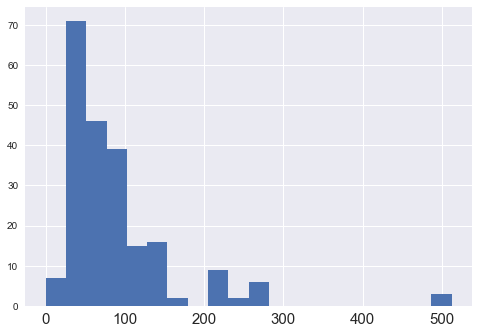

In [87]:
print len(titanic_df.loc[titanic_df['Pclass'] == 1])
print len(titanic_df.loc[titanic_df['Pclass'] == 2])
print len(titanic_df.loc[titanic_df['Pclass'] == 3])

print len(titanic_df.loc[titanic_df['Pclass'] == 1]) + len(titanic_df.loc[titanic_df['Pclass'] == 2]) + len(titanic_df.loc[titanic_df['Pclass'] == 3])

print ' '
print titanic_df.loc[titanic_df['Pclass'] == 1]['Fare'].max()
print titanic_df.loc[titanic_df['Pclass'] == 1 & (titanic_df['Fare'] != 0)]['Fare'].min()
print titanic_df.loc[titanic_df['Pclass'] == 1]['Fare'].mean()
print len(titanic_df.loc[(titanic_df['Pclass'] == 1) & (titanic_df['Fare'] == 0)])
print len(titanic_df.loc[(titanic_df['Pclass'] == 1) & (titanic_df['Fare'] != 0)])

print ' '
print titanic_df.loc[titanic_df['Pclass'] == 2]['Fare'].max()
print titanic_df.loc[titanic_df['Pclass'] == 2 & (titanic_df['Fare'] != 0)]['Fare'].min()
print len(titanic_df.loc[(titanic_df['Pclass'] == 2) & (titanic_df['Fare'] == 0)])
print len(titanic_df.loc[(titanic_df['Pclass'] == 2) & (titanic_df['Fare'] != 0)])
print  ' '
print titanic_df.loc[titanic_df['Pclass'] == 3]['Fare'].max()
print titanic_df.loc[titanic_df['Pclass'] == 3 & (titanic_df['Fare'] != 0)]['Fare'].min()
print len(titanic_df.loc[(titanic_df['Pclass'] == 3) & (titanic_df['Fare'] == 0)])
print len(titanic_df.loc[(titanic_df['Pclass'] == 3) & (titanic_df['Fare'] != 0)])

plt.hist(titanic_df.loc[titanic_df['Pclass'] == 1]['Fare'], bins=20)

**wrangling**

* find out NaN registries
* check if the base has other than specified values on categoricals (exs. idade maior que 100 e menor que 0, pclass diferente de 1,2,3 sexo diferente de h, m, survived diferente de 0,1,.... se tenho valores zerados de bilhetes)
* histograma de idade pra ver se não tem muito 0 na base
* tem id de passageiro repetido?
* check dtype for each column .info()


* para explore: gráfico de linha de quantidade de passageiro por classe

[]

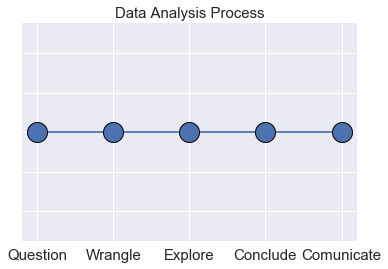

In [158]:
process = pd.Series([1, 1, 1, 1, 1], index=['Question', 'Wrangle', 'Explore', 'Conclude', 'Comunicate'])
x = range(5)
plt.xticks(x, process.index)

plt.plot(x, process.values, marker='o', markersize=20, markeredgecolor='black', markeredgewidth=1)
#plt.plot(x[1], process.values[1], markerfacecolor='r', marker='o', markersize=20, markeredgecolor='black', markeredgewidth=1)

plt.rc('xtick', labelsize=15) 
plt.title('Data Analysis Process', fontsize=15)

#hide y axis label
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])

references

x axis with string https://stackoverflow.com/questions/7559242/matplotlib-strings-as-labels-on-x-axis

hide axis https://codeyarns.com/2015/06/29/how-to-hide-axis-of-plot-in-matplotlib/

titanic dataset https://www.kaggle.com/c/titanic/data

titanic wikipedia https://en.wikipedia.org/wiki/RMS_Titanic

titanic kaggle kernel tutorial https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

titanic tickets fare https://www.kaggle.com/c/titanic/discussion/33087

Rose Amelie Icard letter http://www.telegraph.co.uk/history/titanic-anniversary/10713889/Titanic-letter-reveals-new-first-hand-account-of-disaster.html